In [3]:
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.python.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def cnn_model():
    model = tf.keras.models.Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  # Comma added here
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  # Comma added here
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  # Comma added here
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  # Comma added here
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  # Comma added here
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))
    
    model.compile(
        optimizer=Adam(lr=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

model = cnn_model()

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [18]:
from tensorflow.keras.losses import MeanSquaredError
import tensorflow as tf

def generate_image_adversary(model, image, label, eps=2 / 255.0):
    # Cast the image
    image = tf.cast(image, tf.float32)

    # Record our gradients
    with tf.GradientTape() as tape:
        # Explicitly indicate that our image should be tracked for gradient updates
        tape.watch(image)
        
        # Use our model to make predictions on the input image and then compute the loss
        pred = model(image)
        loss = MeanSquaredError()(label, pred)  # Use MeanSquaredError class to create an instance

    # Get the gradients of the loss with respect to the input image
    gradient = tape.gradient(loss, image)
    signedGrad = tf.sign(gradient)
    
    # Construct the image adversary
    adversary = (image + (signedGrad * eps)).numpy()
    
    # Return the image adversary to the calling function
    return adversary


In [2]:
#from pyimagesearch.simplecnn import SimpleCNN
#from pyimagesearch.fgsm import generate_image_adversary
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import pandas as pd

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load the FER2013 dataset from the CSV file
fer2013_data = pd.read_csv("D:\\SEM-V\\ML\\New folder\\icml_face_data.csv")

# Assuming 'emotion' column contains integer labels
labels = fer2013_data['emotion'].values

# Assuming 'pixels' column contains pixel values as strings separated by spaces
pixels = fer2013_data[' pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
images = np.vstack(pixels.values)
images = images.reshape(-1, 48, 48, 1).astype('float32') / 255.0

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
trainY = to_categorical(trainY, 7)  # 7 classes for FER2013
testY = to_categorical(testY, 7)   # Adjust based on the number of classes in your dataset


In [13]:
#from pyimagesearch.simplecnn import SimpleCNN	metrics=["accuracy"])
# train the simple CNN on FER2013
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

def cnn_model():
    model = tf.keras.models.Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))
    
    model.compile(
        optimizer=Adam(lr=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

# Create an instance of the model using the cnn_model function
model = cnn_model()

# Model summary
model.summary()

print("[INFO] compiling model...")
opt = Adam(lr=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# The rest of your code...

print("[INFO] training network...")
model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=64,
	epochs=30,
	verbose=1)
# make predictions on the testing set for the model trained on
# non-adversarial images
(loss, acc) = model.evaluate(x=testX, y=testY, verbose=0)
print("[INFO] loss: {:.4f}, acc: {:.4f}".format(loss, acc))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_28 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_30 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 128)      

[INFO] compiling model...
[INFO] training network...
Epoch 1/30
449/449 [==============================] - 267s 592ms/step - loss: 6.6612 - accuracy: 0.2381 - val_loss: 4.2140 - val_accuracy: 0.2524
Epoch 2/30
449/449 [==============================] - 285s 635ms/step - loss: 2.8021 - accuracy: 0.3888 - val_loss: 2.8148 - val_accuracy: 0.3002
Epoch 3/30
449/449 [==============================] - 274s 611ms/step - loss: 2.7005 - accuracy: 0.4630 - val_loss: 2.5198 - val_accuracy: 0.4217
Epoch 4/30
449/449 [==============================] - 281s 626ms/step - loss: 2.4935 - accuracy: 0.4898 - val_loss: 2.6811 - val_accuracy: 0.3901
Epoch 5/30
449/449 [==============================] - 318s 708ms/step - loss: 2.4957 - accuracy: 0.4991 - val_loss: 2.4383 - val_accuracy: 0.5237
Epoch 6/30
449/449 [==============================] - 278s 619ms/step - loss: 2.4200 - accuracy: 0.5090 - val_loss: 2.5162 - val_accuracy: 0.4852
Epoch 7/30
449/449 [==============================] - 303s 675ms/step -

In [16]:
model.save("attack.h5")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_34 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization_37 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 24, 24, 128)      

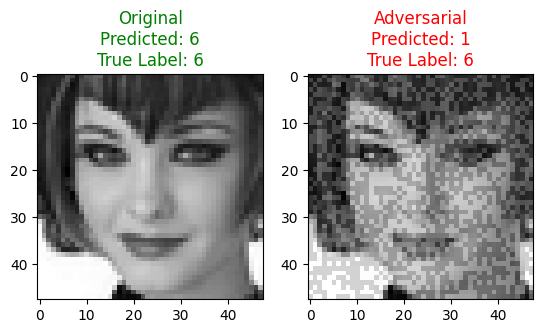

1/1 [==============================] - 0s 23ms/step


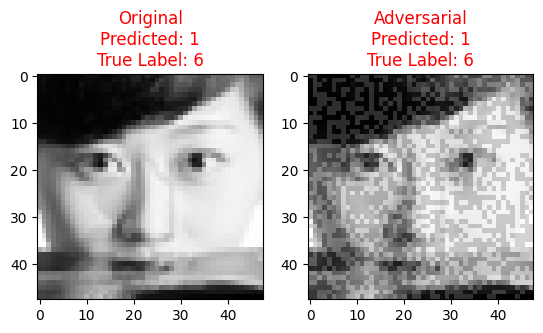

1/1 [==============================] - 0s 22ms/step


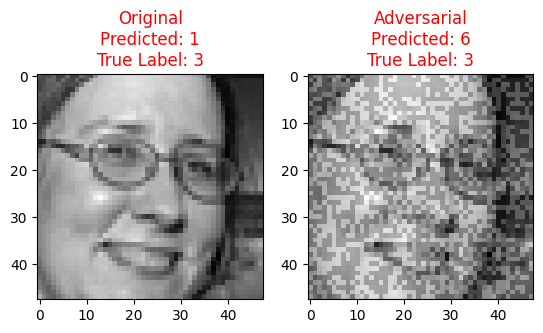

1/1 [==============================] - 0s 21ms/step


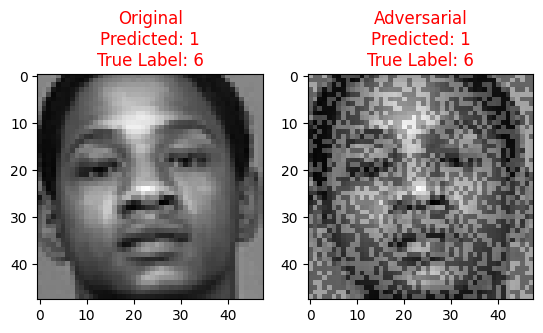

1/1 [==============================] - 0s 22ms/step


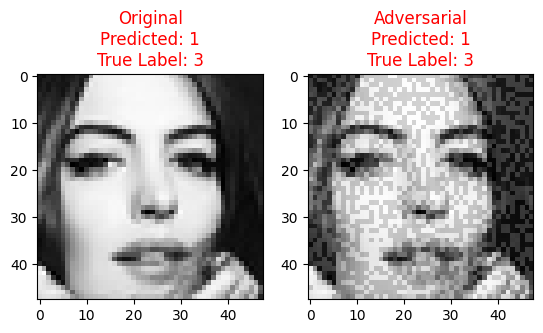

1/1 [==============================] - 0s 20ms/step


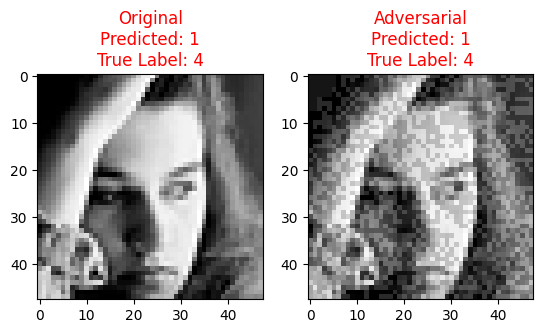

1/1 [==============================] - 0s 21ms/step


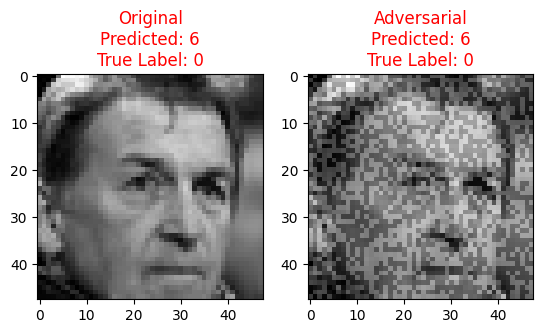

1/1 [==============================] - 0s 21ms/step


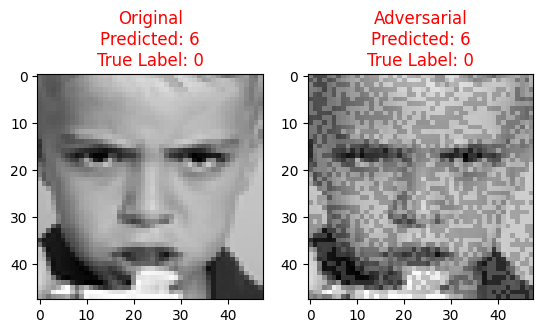

1/1 [==============================] - 0s 20ms/step


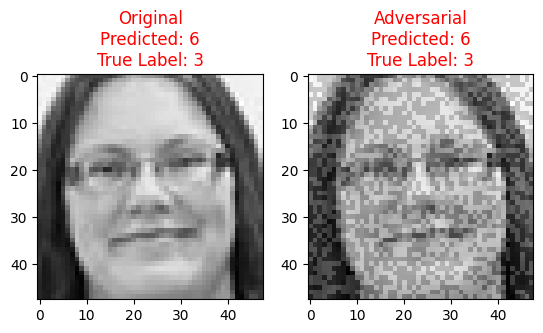

1/1 [==============================] - 0s 20ms/step


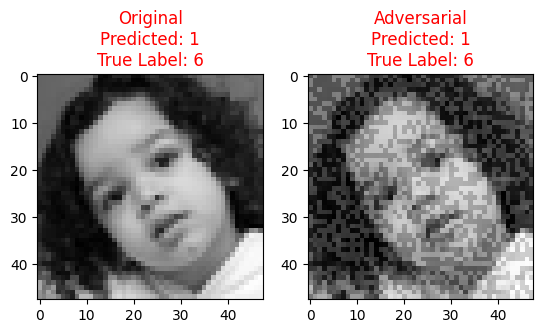

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError

def cnn_model():
    model = tf.keras.models.Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))  
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))

    model.add(Dense(7, activation='softmax'))
    
    model.compile(
        optimizer=Adam(lr=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    
    return model

# Create an instance of the model using the cnn_model function
model = cnn_model()

# Model summary
model.summary()
def generate_image_adversary(model, image, label, eps=2 / 255.0):
    # Cast the image
    image = tf.cast(image, tf.float32)

    # Record our gradients
    with tf.GradientTape() as tape:
        # Explicitly indicate that our image should be tracked for gradient updates
        tape.watch(image)
        
        # Use our model to make predictions on the input image and then compute the loss
        pred = model(image)
        loss = MeanSquaredError()(label, pred)  # Use MeanSquaredError class to create an instance

    # Get the gradients of the loss with respect to the input image
    gradient = tape.gradient(loss, image)
    signedGrad = tf.sign(gradient)
    
    # Construct the image adversary
    adversary = (image + (signedGrad * eps)).numpy()
    
    # Return the image adversary to the calling function
    return adversary

# Load the FER2013 dataset from the CSV file
fer2013_data = pd.read_csv("D:\\SEM-V\\ML\\New folder\\icml_face_data.csv")

# Assuming 'emotion' column contains integer labels
labels = fer2013_data['emotion'].values

# Assuming 'pixels' column contains pixel values as strings separated by spaces
pixels = fer2013_data[' pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' '))
images = np.vstack(pixels.values)
images = images.reshape(-1, 48, 48, 1).astype('float32') / 255.0

# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)

# One-hot encode the labels
trainY = to_categorical(trainY, 7)  # 7 classes for FER2013
testY = to_categorical(testY, 7)   # Adjust based on the number of classes in your dataset

# ... (your model and training code)

# Generate and evaluate adversaries
for i in np.random.choice(np.arange(0, len(testX)), size=(10,)):
    # grab the current image and label
    original_image = testX[i]
    original_label = testY[i]
    
    # generate an image adversary for the current image
    adversary = generate_image_adversary(model, original_image.reshape(1, 48, 48, 1), original_label, eps=0.1)
    
    # make predictions on the original and adversarial images
    original_pred = model.predict(original_image.reshape(1, 48, 48, 1))
    adversarial_pred = model.predict(adversary)
    
    # determine the predicted label for both images
    original_label_pred = np.argmax(original_pred)
    adversarial_label_pred = np.argmax(adversarial_pred)
    
    # create a figure to display the images
    fig, axs = plt.subplots(1, 2)
    
    # set titles based on predictions
    original_title = f"Original\nPredicted: {original_label_pred}\nTrue Label: {np.argmax(original_label)}"
    adversarial_title = f"Adversarial\nPredicted: {adversarial_label_pred}\nTrue Label: {np.argmax(original_label)}"
    
    # update color based on match
    original_color = 'green' if original_label_pred == np.argmax(original_label) else 'red'
    adversarial_color = 'green' if adversarial_label_pred == np.argmax(original_label) else 'red'
    
    # display the original image
    axs[0].imshow(original_image.squeeze(), cmap='gray')
    axs[0].set_title(original_title, color=original_color)
    
    # display the adversarial image
    axs[1].imshow(adversary.squeeze(), cmap='gray')
    axs[1].set_title(adversarial_title, color=adversarial_color)
    
    plt.show()
